## Question 1: Data Understanding

### 1.1 user_features.csv 

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read user features data and check the data structure
userFeatures=pd.read_csv("user_features.csv")  
userFeatures.info() # check the structure of the data
userFeatures.head() # check what the data looks like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
user_id                    12000 non-null int64
number_of_clicks_before    11500 non-null object
ordered_before             12000 non-null bool
personal_interests         12000 non-null object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


In [3]:
#get the summary of the data of users features
userFeatures.describe() # get the descriptive statistics of the numberic valiables

,user_id
count,12000.00000
mean,105999.50000
std,3464.24595
min,100000.00000
25%,102999.75000
50%,105999.50000
75%,108999.25000
max,111999.00000


### 1.2 product_features.csv 

In [4]:
# read product features data and check the data structure
proFeatures=pd.read_csv("product_features.csv")
proFeatures.info() # check the data structure
proFeatures.head() # check the head of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
product_id           1000 non-null int64
category             1000 non-null object
on_sale              1000 non-null bool
number_of_reviews    1000 non-null int64
avg_review_score     1000 non-null float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


In [5]:
# Check the descriptive statistics of nummerics variables
proFeatures.describe() 

,product_id,number_of_reviews,avg_review_score
count,1000.000000,1.000000e+03,1000.000000
mean,1499.500000,1.157725e+05,2.660656
std,288.819436,5.028997e+05,1.741875
min,1000.000000,6.600000e+01,-1.000000
25%,1249.750000,2.570000e+02,1.428969
50%,1499.500000,4.710000e+02,2.769397
75%,1749.250000,7.042500e+02,4.180860
max,1999.000000,2.307390e+06,5.000000


### 1.3 click_history.csv 

In [6]:
# read product features data and check the data structure
click=pd.read_csv("click_history.csv") 
click.info() # check the structure of the dataframe
click.head() # take a look at the head of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
user_id       35990 non-null int64
product_id    35990 non-null int64
clicked       35990 non-null bool
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


In [7]:
# Check the descriptive statistics of nummerics variables
click.describe()   # not informative since they are user_id and product_id

,user_id,product_id
count,35990.000000,35990.000000
mean,106017.080161,1500.232898
std,3483.480090,288.101984
min,100001.000000,1000.000000
25%,102976.500000,1250.000000
50%,106060.000000,1503.000000
75%,109049.000000,1749.000000
max,111999.000000,1999.000000


## Question 2: Data Cleaning and Preprocessing

### 2.1 Check duplicated rows

In [8]:
#check duplicated rows
print(userFeatures.duplicated().sum()) # output is 0, no duplicated rows
print(proFeatures.duplicated().sum()) # output is 0, no duplicated rows
print(click.duplicated().sum()) # output is 0, no duplicated rows

0
0
0


### 2.2 Check and handle missing values

In [9]:
# check missing value for each dataset

print("Missing value for userFeatures: \n", userFeatures.isnull().sum()) 
# the variable number_of_clicks_before has 500 missing values

print("\n Missing value for proFeatures: \n", proFeatures.isnull().sum().values.sum()) # 0, no missing values

print("\n Missing value for clicks: \n", click.isnull().sum().values.sum()) # 0,no missing values

Missing value for userFeatures: 
 user_id                      0
number_of_clicks_before    500
ordered_before               0
personal_interests           0
dtype: int64

 Missing value for proFeatures: 
 0

 Missing value for clicks: 
 0


In [10]:
# check the distribution of the number_of_clicks_before

print(userFeatures.groupby(["number_of_clicks_before"]).count()) # the number_of_clicks_before=2 has the most count number
#so I decide to replace the missing value with 2

userFeatures.fillna(2,inplace=True) # fill the missing value with 2

                         user_id  ordered_before  personal_interests
number_of_clicks_before                                             
0                           2196            2196                2196
1                           2399            2399                2399
2                           2710            2710                2710
3                             59              59                  59
4                            711             711                 711
5                           1057            1057                1057
6+                          2368            2368                2368


In [11]:
# check if there is still missing value
userFeatures.isnull().sum() # ouput is 0, no missing value

user_id                    0
number_of_clicks_before    0
ordered_before             0
personal_interests         0
dtype: int64

### 2.3 Seperate cells with multiple values and get dummies

In [12]:
# separate personal_interests variable 
import ast

userFeatures.personal_interests = userFeatures.personal_interests.apply(lambda x: ast.literal_eval(x))

In [13]:
# convert it to numerical variable using get_dummies
dumPerInt = pd.get_dummies(userFeatures.personal_interests.apply(pd.Series).stack()).sum(level=0)

dumPerInt.head(3)

,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools
0,1,1,1,1,1,1,1,0,1,0,1
1,1,0,0,0,0,1,1,1,1,1,1
2,0,1,0,0,0,1,0,0,1,0,1


In [14]:
# Concatenate the original dataframe with the dummies
userFeatures1 = pd.concat([userFeatures, dumPerInt], axis=1)

userFeatures1.head(3)

,user_id,number_of_clicks_before,ordered_before,personal_interests,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools
0,104939,2,True,"[body, makeup, nail, hand, foot, men_fragrance...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,101562,2,True,"[men_skincare, men_fragrance, tools, skincare,...",1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,102343,2,True,"[tools, makeup, foot, nail]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [15]:
#drop the personal_interests column since the dummy vairables has replaced its information
userFeatures1.drop(["personal_interests"], axis=1, inplace=True)

# check if there is new missing values appeared
userFeatures1.isnull().sum() # all the dummies has 1096 missing values in each variable

user_id                       0
number_of_clicks_before       0
ordered_before                0
body                       1096
foot                       1096
fragrance                  1096
hair                       1096
hand                       1096
makeup                     1096
men_fragrance              1096
men_skincare               1096
nail                       1096
skincare                   1096
tools                      1096
dtype: int64

In [16]:
# fill the NA with 0 since the NAs are from cells where a user doesnot have the specific personal_interest

userFeatures1.fillna(0,inplace=True)

# again check the missing values 

userFeatures1.isnull().sum()

user_id                    0
number_of_clicks_before    0
ordered_before             0
body                       0
foot                       0
fragrance                  0
hair                       0
hand                       0
makeup                     0
men_fragrance              0
men_skincare               0
nail                       0
skincare                   0
tools                      0
dtype: int64

### 2.4 Merge the dataframes

In [17]:
# merge the data frame
df1=pd.merge(userFeatures1,click,on="user_id")
df1.head()
df2=pd.merge(df1,proFeatures,on="product_id")
df2.isnull().sum() # there is no missing value
df2.shape

(35990, 20)

### 2.5 Encoding the categorical variables

In [18]:
# encoding the category variables into numbers

print(df2.category.unique()) # check the category variable 

df2.category=df2.category.astype("category").cat.codes # encoding the category variable 

# Encoding the other categorical variables

df2.ordered_before=df2.ordered_before.astype("category").cat.codes # encoding ordered_before

df2.clicked=df2.clicked.astype("category").cat.codes # encoding_clicked

df2.on_sale=df2.on_sale.astype("category").cat.codes # encoding on_sale

df2.number_of_clicks_before=df2.number_of_clicks_before.astype("category").cat.codes # encoding number_of_clicks before

df2.head()

['hair' 'men_skincare' 'foot' 'hand' 'makeup' 'body' 'men_fragrance'
 'fragrance' 'tools' 'skincare' 'nail']


,user_id,number_of_clicks_before,ordered_before,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score
0,104939,3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1212,0,3,1,789,1.461363
1,101992,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1212,0,3,1,789,1.461363
2,110175,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1212,1,3,1,789,1.461363
3,111017,2,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1212,0,3,1,789,1.461363
4,105516,7,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1212,0,3,1,789,1.461363


In [19]:
# check if there is duplicated rows
df2.duplicated().sum()

0

### 2.6 Check the outliers

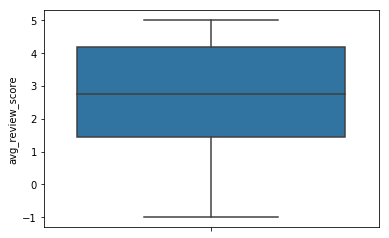

In [20]:
# make plot to check the outliers for avg_review_score
sns.boxplot(y=df2.avg_review_score) # from the boxplot, it seems there is no outliers

In [21]:
# define a function to check outliers

def outliers_IQR(Var):    
    Q1, Q3 = np.percentile(Var, [25, 75]) # get Q1 and Q3 of a variable    
    IQR = Q3-Q1    # caculate the IQR    
    lower_bound=Q1-(IQR*1.5)  # define the lower threshold of outliers  Q1-1.5IQR 
    upper_bound=Q3 + (IQR*1.5) # define the upper threshold of outliers  Q3+1.5IQR 
    return np.where((Var > upper_bound) | (Var < lower_bound)) # return the index of outliers

print(outliers_IQR(df2.avg_review_score)) # call the function and display the index of outliers of avg_review_score

# output is empty array, indicating no outliers in this variable


(array([], dtype=int64),)


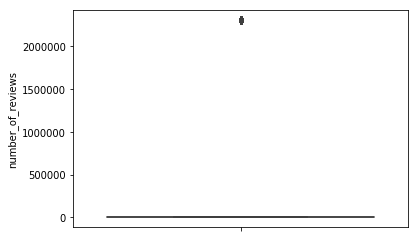

In [22]:
# visulaize the distribution of number_of_reviews
sns.boxplot(y=df2.number_of_reviews) #it seems there is a group of extremely big values 

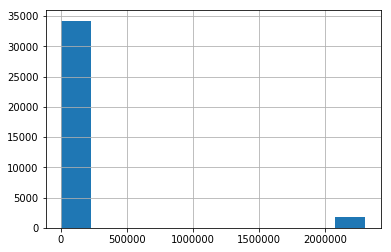

In [23]:
# check the histogram
df2.number_of_reviews.hist() # the number_of_reviews distributed into two groups

In [24]:
# check the outliers using the function
review_Out=outliers_IQR(df2.number_of_reviews)
print(review_Out) # display the index of outliers
print(len(review_Out[0])) # display number of outliers, output shows there are 1770 outliers

(array([  413,   414,   415, ..., 35859, 35860, 35861], dtype=int64),)
1770


#### 2.6.1 keep the outliers---df2

In [25]:
df3=df2.loc[review_Out[0],:] # extracting the rows with outliers from the dataframe

#check if the outliers are in some certain group
df3.groupby("clicked").count() # it seems the most of outliers are from product have been clicked, so it mostly 
#belongs to one group, I think maybe it will not influence the result much, I decide to keep the outliers

,user_id,number_of_clicks_before,ordered_before,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,product_id,category,on_sale,number_of_reviews,avg_review_score
clicked,,,,,,,,,,,,,,,,,,,
0,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126,1126
1,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644


#### 2.6.2 Remove the outliers---df2a

(34220, 20)


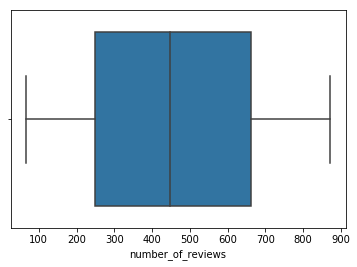

In [26]:
# I also want to see how the ouliters will influence the results of prediction
# so here I remove the outliers and save it to another dataframe to compare the model with two datasets

df2a=df2.copy() # copy the merged dataset

df2a.drop(df2a.index[review_Out[0]],axis=0,inplace=True) # remove the rows with outliers

sns.boxplot(df2a.number_of_reviews) # make a boxlot to see the new distribution, no more outliers anymore on th plot

print(df2a.shape)


## Question 3: Model Generation and Evaluation

### 3.1 Split the data into training and testing dataset

In [27]:
# import the modules

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier 


In [28]:
# split the dataframe into features and target

X=df2.drop(columns=["user_id","product_id","clicked"],axis=1) # drop the three columns and set it as features
Y=df2.loc[:,"clicked"]   # set clicked column as target

# do the samething as above using dataset without outliers
X1=df2a.drop(columns=["user_id","product_id","clicked"],axis=1) 
Y1=df2a.loc[:,"clicked"]

# split the data with 0.7/0.3 for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0,train_size=0.7)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1,random_state=0,train_size=0.7)

C:\Users\thiago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 3.2 KNeigborsClassifier model

#### 3.2.1 Modeling with dataset including outliers

[0.6738908956191535, 0.6954709641567102, 0.7074187274242846, 0.7096415671019728, 0.720755765490414, 0.7196443456515699, 0.7264981013244419, 0.7244604982865611, 0.7295545058812634, 0.7295545058812634, 0.7330740020376031, 0.732518292118181, 0.7330740020376031, 0.7358525516347133, 0.7368713531536538, 0.7391868111512457, 0.7377049180327869, 0.7373344447531722, 0.7385384829119199]


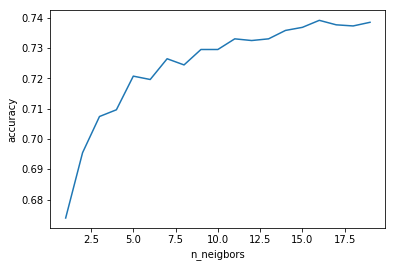

In [29]:
accuracy=[]  # initiate accuracy

k=range(1,20)  # set k from 1 to 19

# write a for loop to find the best k
for i in k:  
    
    model=KNeighborsClassifier(n_neighbors=i) # build  the model KNeighborsClassifier

    model.fit(X_train, Y_train) # fit the model with train set

    Y_predict=model.predict(X_test) # use the mode to predict the test set

    accuracy.append(accuracy_score(Y_test, Y_predict)) # add the accuracy for each model
    
print(accuracy) # display the accuracy

plt.plot(k,accuracy) # plot accuracy vs k

plt.xlabel("n_neigbors") # add xlabel

plt.ylabel("accuracy") # add ylabel

plt.show() # display the plot shows when k=16, the accuracy is highest, about 0.74


In [30]:
# select k=16 to fit a model and check the result

model1=KNeighborsClassifier(n_neighbors=16)  # chooose k=16 and build model

model1.fit(X_train, Y_train)  # fit the model with training data

Y_predict=model1.predict(X_test)  # predict the test data with model

print("accuracy: \n", accuracy_score(Y_test, Y_predict))  # display the accuracy

print("confusion_matrix: \n", confusion_matrix(Y_test, Y_predict))  # display the confusion_matrix

print("classification_report: \n", classification_report(Y_test, Y_predict))  # display the classification report

accuracy: 
 0.7391868111512457
confusion_matrix: 
 [[5853 1061]
 [1755 2128]]
classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      6914
           1       0.67      0.55      0.60      3883

   micro avg       0.74      0.74      0.74     10797
   macro avg       0.72      0.70      0.70     10797
weighted avg       0.73      0.74      0.73     10797



#### 3.2.2 Modeling dataset without the outliers

[0.6808883693746347, 0.700759789596727, 0.7110851353984025, 0.7179037599844146, 0.7232612507305669, 0.7279368790181181, 0.7332943697642704, 0.7335865965322423, 0.7373855445158777, 0.7369959088252483, 0.7394311318916813, 0.7396259497369959, 0.744301578024547, 0.7434248977206313, 0.7453730761737776, 0.7448860315604909, 0.7470290278589519, 0.7457627118644068, 0.7477108903175531]


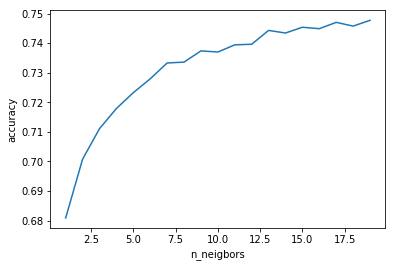

In [31]:
# modeling with data removing the outliers

accuracy1=[]  # initiate accuracy1

k1=range(1,20) # set k1 from 1 to 19

#write a for loop to find the best k

for i in k1:
    
    model1=KNeighborsClassifier(n_neighbors=i) # build model

    model1.fit(X1_train, Y1_train) # fit model

    Y1_predict=model1.predict(X1_test) # predict data

    accuracy1.append(accuracy_score(Y1_test, Y1_predict)) # add accuracy from each model
    
print(accuracy1) # display accuracy

plt.plot(k1,accuracy1)  # plot accuracy vs k1

plt.xlabel("n_neigbors") # add xlabel

plt.ylabel("accuracy") # add ylabel

plt.show() # the plot shows when k=19, the accuracy is highest, about 0.75

In [32]:
model1=KNeighborsClassifier(n_neighbors=19) # set k=19 to build model

model1.fit(X1_train, Y1_train) # fit the model

Y1_predict=model1.predict(X1_test) # predict the data

print("accuracy_score: \n",accuracy_score(Y1_test, Y1_predict)) # display the accuracy

print("confusion_matrix: \n",confusion_matrix(Y1_test, Y1_predict)) # display a confusion matrix

print("classification_report: \n", classification_report(Y1_test, Y1_predict)) # display the classification report

accuracy_score: 
 0.7477108903175531
confusion_matrix: 
 [[5513 1123]
 [1467 2163]]
classification_report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      6636
           1       0.66      0.60      0.63      3630

   micro avg       0.75      0.75      0.75     10266
   macro avg       0.72      0.71      0.72     10266
weighted avg       0.74      0.75      0.74     10266



### 3.3 decision tree

#### 3.3.1 Modeling dataset including outliers

[0.6403630638140224, 0.7122348800592757, 0.7326109104380847, 0.732518292118181, 0.7413170325090302, 0.74483652866537, 0.7409465592294155, 0.7464110401037325, 0.7431693989071039, 0.735945169954617, 0.7285357043623228, 0.7176993609335927, 0.7091784755024544, 0.7014911549504492]


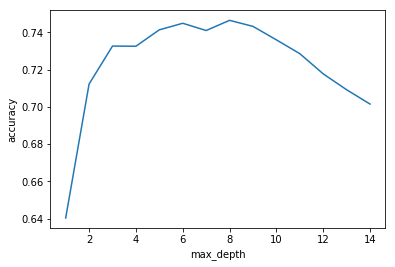

In [33]:
k2=range(1,15) # set k from 1 to 14

score=[] # intiate score

# write a for loop to find the best k

for i in k2:  
    
    model2 = tree.DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=0) # build model

    model2.fit(X_train, Y_train) # fit the model

    Y_predict=model2.predict(X_test) # predict the test data

    score.append(accuracy_score(Y_test, Y_predict)) # add accuracy from each model
    
print(score) # display score

plt.plot(k2,score) # plot score vs k 

plt.xlabel("max_depth") # add xlabel

plt.ylabel("accuracy") # add y label

plt.show() # display plot,score=74.64% is highest when max_depth=8


In [34]:
# choose the best max_depth to build model and check result

model2 = tree.DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state=0) # build model with max-depth=8

model2.fit(X_train, Y_train) # fit a model

Y_predict=model2.predict(X_test) # predict test data

print("accuracy_score: \n",accuracy_score(Y_test, Y_predict)) # display accuracy

print("confusion_matrix: \n",confusion_matrix(Y_test, Y_predict)) # display confusion_matrix

print("classification_report: \n",classification_report(Y_test, Y_predict)) # displayclassification report

accuracy_score: 
 0.7464110401037325
confusion_matrix: 
 [[5769 1145]
 [1593 2290]]
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      6914
           1       0.67      0.59      0.63      3883

   micro avg       0.75      0.75      0.75     10797
   macro avg       0.73      0.71      0.72     10797
weighted avg       0.74      0.75      0.74     10797



#### 3.3.2 Modeling dataset without outliers

[0.6464056107539451, 0.7167348529125268, 0.7392363140463667, 0.7435223066432886, 0.7511202026105591, 0.7513150204558737, 0.7529709721410481, 0.7499512955386713, 0.74673680109098, 0.74274303526203, 0.7347555036041301, 0.724527566725112, 0.7204363919735047, 0.7069939606467952]


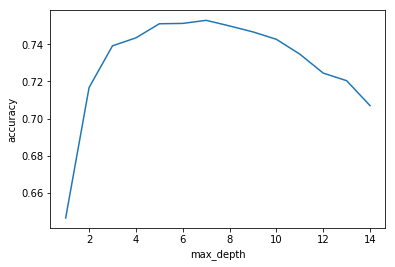

In [35]:
k2=range(1,15) # set k from 1 to 14

score_1=[] #initiate score_1

#write a for loop to find the best max_depth

for i in k2:  
    
    model2 = tree.DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=0) # build a model 

    model2.fit(X1_train, Y1_train) # fit model

    Y1_predict=model2.predict(X1_test) # predict the test data

    score_1.append(accuracy_score(Y1_test, Y1_predict)) #add score_1 from each model
    
print(score_1) #display score_1

plt.plot(k2,score_1) #plot max_depth vs score_1

plt.xlabel("max_depth") # add xlabel

plt.ylabel("accuracy") # add ylabel

plt.show() #display plot, score=75.30% is highest when max_depth=7


In [36]:
#build model with best max_depth and check the result

model2 = tree.DecisionTreeClassifier(max_depth=7,criterion="entropy",random_state=0) # bbuild model with max_depth=7

model2.fit(X1_train, Y1_train) # fit the model

Y1_predict=model2.predict(X1_test) # predict test data

print("accuracy_score: \n",accuracy_score(Y1_test, Y1_predict)) # display accuracy

print("confusion_matrix: \n",confusion_matrix(Y1_test, Y1_predict)) # display confusion matrix

print("classification_report: \n",classification_report(Y1_test, Y1_predict)) # display classification report

accuracy_score: 
 0.7529709721410481
confusion_matrix: 
 [[5517 1119]
 [1417 2213]]
classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      6636
           1       0.66      0.61      0.64      3630

   micro avg       0.75      0.75      0.75     10266
   macro avg       0.73      0.72      0.72     10266
weighted avg       0.75      0.75      0.75     10266



### 3.4 Random forest

#### 3.4.1 Modeling dataset including outliers

In [37]:
model3=RandomForestClassifier(n_estimators=30, random_state=0) # build a model with n_estimator=30

model3.fit(X_train,Y_train) # fit the model

Y_predict=model3.predict(X_test) # predict test data

print("accuracy_score: \n", accuracy_score(Y_test, Y_predict)) # display the accuracy

print("confusion_matrix: \n", confusion_matrix(Y_test, Y_predict)) # display the confusion matrix

print("classification_report: \n", classification_report(Y_test, Y_predict)) # display the classification_report

accuracy_score: 
 0.7315921089191442
confusion_matrix: 
 [[5842 1072]
 [1826 2057]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      6914
           1       0.66      0.53      0.59      3883

   micro avg       0.73      0.73      0.73     10797
   macro avg       0.71      0.69      0.69     10797
weighted avg       0.72      0.73      0.72     10797



#### 3.4.2 Modeling dataset without outliers

In [38]:
model3=RandomForestClassifier(n_estimators=30, random_state=0) # build a model with n_estimator=30

model3.fit(X1_train,Y1_train) # fit the model

Y1_predict=model3.predict(X1_test) # predict test data

print("accuracy_score: \n", accuracy_score(Y1_test, Y1_predict)) # display the accuracy

print("confusion_matrix: \n", confusion_matrix(Y1_test, Y1_predict)) # display the confusion matrix

print("classification_report: \n", classification_report(Y1_test, Y1_predict)) # display the classification_report


accuracy_score: 
 0.7358270017533606
confusion_matrix: 
 [[5553 1083]
 [1629 2001]]
classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      6636
           1       0.65      0.55      0.60      3630

   micro avg       0.74      0.74      0.74     10266
   macro avg       0.71      0.69      0.70     10266
weighted avg       0.73      0.74      0.73     10266



## Question 4: Which model has the best performance? What have you learned from the models you built?

### 4.1 Which model has the best performance?

           Model     df2    df2a
0            KNN  0.7391  0.7477
1  Decision tree  0.7464  0.7530
2             RF  0.7316  0.7358


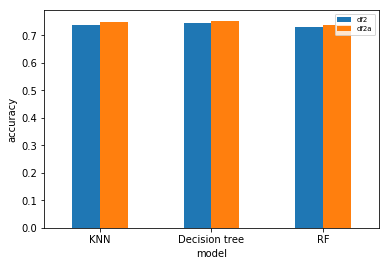

In [39]:
#plot the accuracy vs models

model=["KNN","Decision tree","RF"] # assign model name

df2_out=[0.7391,0.7464,0.7316] # the accuracy of the data with outliers from 3 models

df2a_noOut=[0.7477,0.7530,0.7358] # the accuracy of the data without outliers from 3 models

accuracy=pd.DataFrame({"Model":model,"df2":df2_out,"df2a":df2a_noOut}) # create a dataframe

print(accuracy) # display the dataframe

accuracy.plot.bar() # make a bar plot

plt.xlabel("model") # add xlabel

plt.ylabel("accuracy") # add ylabel

plt.xticks(np.arange(len(model)),model) # set xticks

plt.xticks(rotation=0) # avoid rotation

plt.legend(loc="best",prop={'size':7}) # adjust the size

* From the plot and dataframe, we can see the decision tree model has the highest accuracy in both datasets.
* All three models has higher accuracy in dataset df2a, which is without outliers, so the outliers indeed influence the prediction result. 

### 4.2 What have learned

* Removing outliers can improve the accuracy of a model, so the data cleaning and preprocessing is very important.
* Random forest model is based on decision tree and it should have got better performance, the reason it has less accuracy than the decision tree model is probably that the parameters are not the optimal for the model. Improving the model and getting a better result will take more time and this will be done in my future study.  
* Although decision tree has the highest accuracy and precision, the recall is not the highest in the model. When we choose a model in real life, we should also consider the recall since it is relevant to the consequence of the problem.